In [2]:
import pandas as pd

In [3]:
#read file
marketing_analysis = pd.read_csv("/Users/mariasoriano/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")



In [4]:
#1. Show dataframe shape.
marketing_analysis.shape

(10910, 26)

In [5]:
#2. Standardize header names.
list(marketing_analysis.columns)

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [6]:
#The only header I see that may have trouble is the EmploymeStatus so I separate both words creating: Employment Status
marketing_analysis = marketing_analysis.rename(columns={'EmploymentStatus':'Employment Status'})
marketing_analysis.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
df = marketing_analysis.copy()

In [8]:
cols  = []
for col in df.columns:
    cols.append(col.lower())
df.columns = cols
print(df.columns)

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employment status', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employment status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [10]:
#2. Which columns are numerical?
df.select_dtypes(["number"])

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [11]:
#3. Which columns are categorical?
df.select_dtypes(["object"])

,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [12]:
#5. Check and deal with NaN values.
df.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [13]:
df = df.dropna()

In [14]:
#6. Datetime format - Extract the months from the dataset and store in a separate column.
#Then filter the data to show only the information for the first quarter , ie. January, February and March.
#Hint: If data from March does not exist, consider only January and February.

#marketing_sales["months"] == marketing_sales[[""]]

df['effective to date'] = pd.to_datetime(df['effective to date'], errors='coerce')


In [15]:
df["month"] = df["effective to date"].dt.month

df = df[df["month"]<=3]

df["month"]

2        2
3        1
10       1
13       1
16       2
        ..
10902    1
10903    1
10904    2
10906    1
10908    2
Name: month, Length: 4543, dtype: int64

In [16]:
#marketing_analysis2 = marketing_analysis.copy()

In [17]:
def firstquarter(df):
    #return df[df['Month'].isin([1,2,3])]
    return df[df['month'] <= 3]

#marketing_analysis[marketing_analysis['Month'].isin([1,2,3])]

In [18]:
firstquarter(df)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [19]:
#BONUS
#How to make it all run as a function

#df = marketing_analysis.copy()
#def bonus(df):

#all the code

In [20]:
#then in a different cell
#bonus(marketing_analysis)

In [21]:
#read file
costumer_analysis = pd.read_csv("/Users/mariasoriano/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")




In [22]:
#Show DataFrame info
costumer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#print(costumer_analysis[['Response', 'Sales Channel']])
#costumer_analysis[['Response', 'Sales Channel']].count()

In [25]:
#Describe DataFrame.
costumer_analysis.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [26]:
#list(costumer_analysis.columns)

In [27]:
#costumer_analysis[["Response"]]

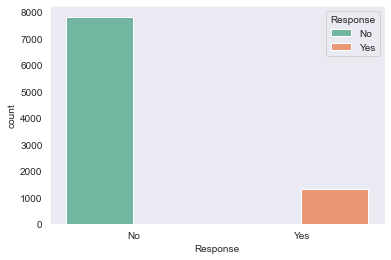

In [28]:
#Show a plot of the total number of responses.
#Using seaborn.countplot.
#Shows the counts of observations in each categorical bin using bars.
sns.set_style("dark")

#Vertical option
sns.countplot(x="Response", data=costumer_analysis, hue="Response", palette="Set2")
plt.show()

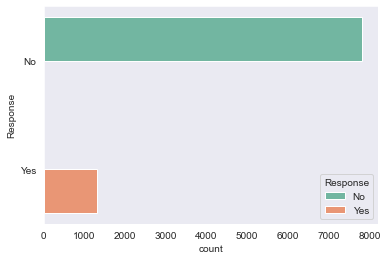

In [29]:
#Horizontal option
sns.countplot(y="Response", data=costumer_analysis, hue="Response", palette="Set2")
plt.show()

In [30]:
#costumer_analysis.info()

In [31]:
#Check what are the unique values inside Sales Channel
#costumer_analysis["Sales Channel"].unique()

In [32]:

#costumer_analysis.groupby(['Sales Channel']).count()

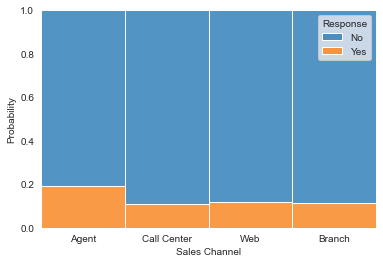

In [33]:
#Show a plot of the response rate by the sales channel.
#I FOUND 3 WAYS

#1.
sns.histplot(data=costumer_analysis, x='Sales Channel', hue='Response', stat='probability', multiple="fill")
plt.show()

<AxesSubplot:xlabel='Sales Channel', ylabel='Count'>

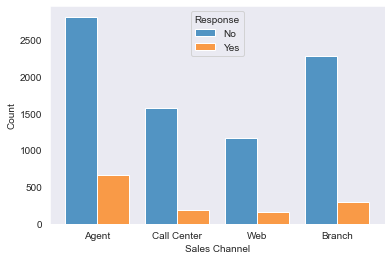

In [34]:
#THIS IS THE OPTION I LIKE THE MOST
sns.histplot(data=costumer_analysis, x="Sales Channel", hue="Response", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Response', ylabel='Count'>

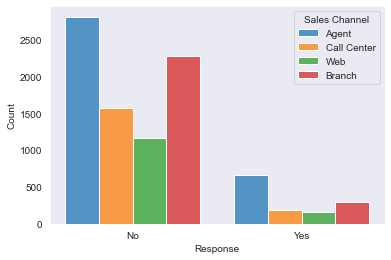

In [35]:
#I THINK THIS IS PRETTY UGLY
sns.histplot(data=costumer_analysis, x="Response", hue="Sales Channel", multiple="dodge", shrink=.8)


In [36]:
costumer_analysis["Total Claim Amount"] = costumer_analysis["Total Claim Amount"].round(decimals = 1)
costumer_analysis[["Response", "Total Claim Amount"]]


,Response,Total Claim Amount
0,No,384.8
1,No,1131.5
2,No,566.5
3,No,529.9
4,No,138.1
...,...,...
9129,No,198.2
9130,Yes,379.2
9131,No,790.8
9132,No,691.2


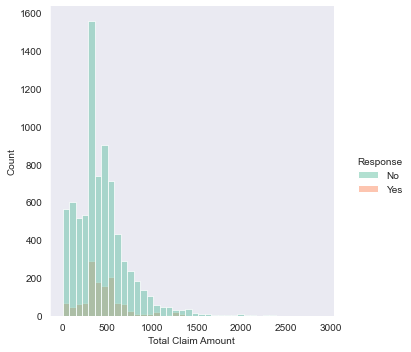

In [37]:
#Show a plot of the response rate by the total claim amount.
#I FOUND TWO WAYS using Seaborn
#this is the one I like the most
sns.displot(x='Total Claim Amount', hue = 'Response', data = costumer_analysis, bins = 40, palette="Set2")
plt.show()

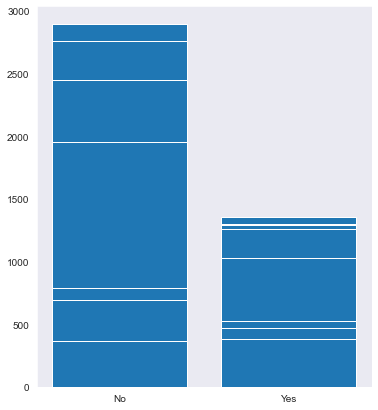

In [38]:
#Show a plot of the response rate by the total claim amount.
#THIS IS A SECOND OPTION USING MATPLOTLIB

#Using matplotlib
response_rate = costumer_analysis['Response']
total_claim = costumer_analysis['Total Claim Amount']
 
# Figure Size
fig = plt.figure(figsize =(6, 7))
 
# Horizontal Bar Plot
plt.bar(response_rate, total_claim)
 
# Show Plot
plt.show()

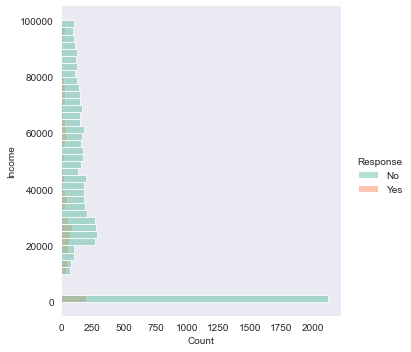

In [39]:
#Show a plot of the response rate by income.
sns.displot(y='Income', hue = 'Response', data = costumer_analysis, bins = 40, palette="Set2")
plt.show()

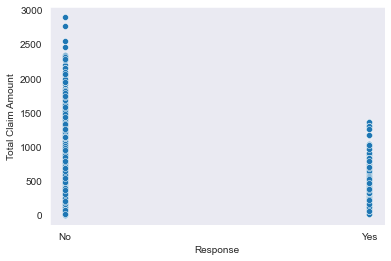

In [40]:
sns.scatterplot(data=costumer_analysis, x="Response", y="Total Claim Amount")
plt.show()

In [ ]:
#I wanted to try this but the Jupyter Notebook doesn't work...

#sns.displot(y='Total Claim Amount', hue = 'Income', data = costumer_analysis, bins = 40, palette="Set2")
#plt.show()